# Initial Exploration of Datasets

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
import glob
import datetime
import sqlite3

/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
track_data = pd.read_csv('../MSD-Data/datasets/song_data.csv')

In [3]:
track_data.describe()

,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,danceability,duration,energy,key,loudness,song_hotttnesss,tempo,time_signature,year
count,9996.000000,10000.000000,3742.000000,3742.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,5648.000000,10000.000000,10000.000000,10000.000000
mean,0.565456,0.385552,37.157357,-63.933358,0.0,238.507518,0.0,5.276100,-10.485669,0.342822,122.915449,3.564800,934.704600
std,0.160161,0.143647,15.598494,50.508223,0.0,114.137514,0.0,3.554087,5.399788,0.247220,35.184412,1.266239,996.650657
min,0.000000,0.000000,-41.280540,-162.436500,0.0,1.044440,0.0,0.000000,-51.643000,0.000000,0.000000,0.000000,0.000000
25%,0.467611,0.325266,33.748310,-93.291560,0.0,176.032200,0.0,2.000000,-13.163250,0.000000,96.965750,3.000000,0.000000
50%,0.563666,0.380742,38.997920,-80.237420,0.0,223.059140,0.0,5.000000,-9.380000,0.360371,120.161000,4.000000,0.000000
75%,0.668020,0.453858,43.648560,-9.401020,0.0,276.375060,0.0,8.000000,-6.532500,0.537504,144.013250,4.000000,2000.000000
max,1.000000,1.082503,69.651020,174.767140,0.0,1819.767710,0.0,11.000000,0.566000,1.000000,262.828000,7.000000,2010.000000


Well, it doesn't look like I'll be able to use the the danceability and energy columns, so I might as well remove them.

In [4]:
del track_data['danceability']
del track_data['energy']

## Histograms: Learn about the distribution of the variables

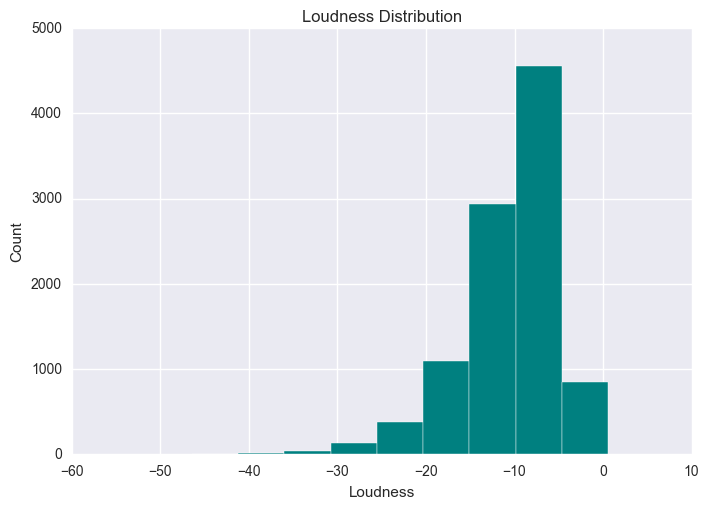

In [5]:
plt.hist(track_data.loudness, color='#008080', edgecolor='white')
plt.xlabel("Loudness")
plt.ylabel("Count")
plt.title("Loudness Distribution")

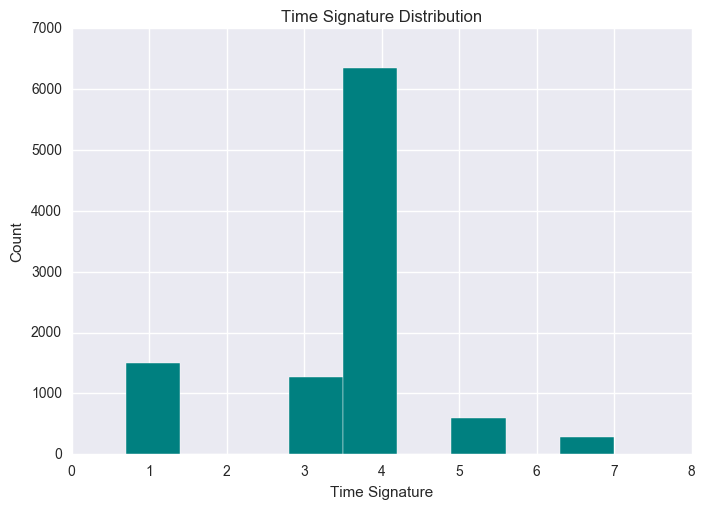

In [6]:
plt.hist(track_data.time_signature, color='#008080', edgecolor='white')
plt.xlabel("Time Signature")
plt.ylabel("Count")
plt.title("Time Signature Distribution")

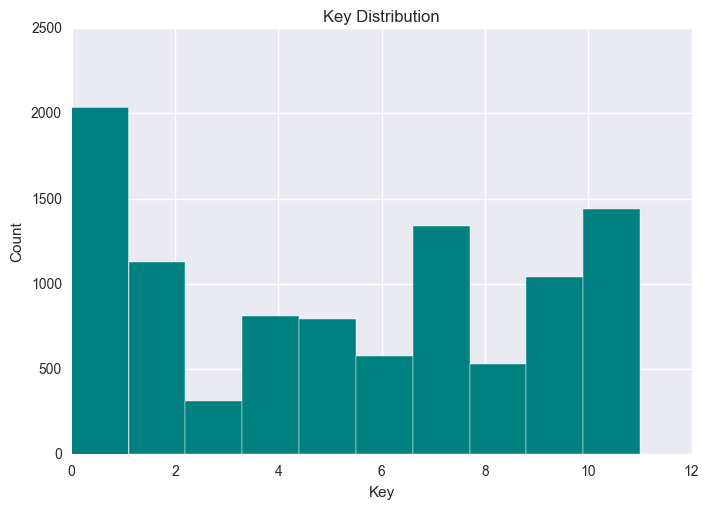

In [7]:
plt.hist(track_data.key, color='#008080', edgecolor='white')
plt.xlabel("Key")
plt.ylabel("Count")
plt.title("Key Distribution")

## Scatterplots: Relationships between variables

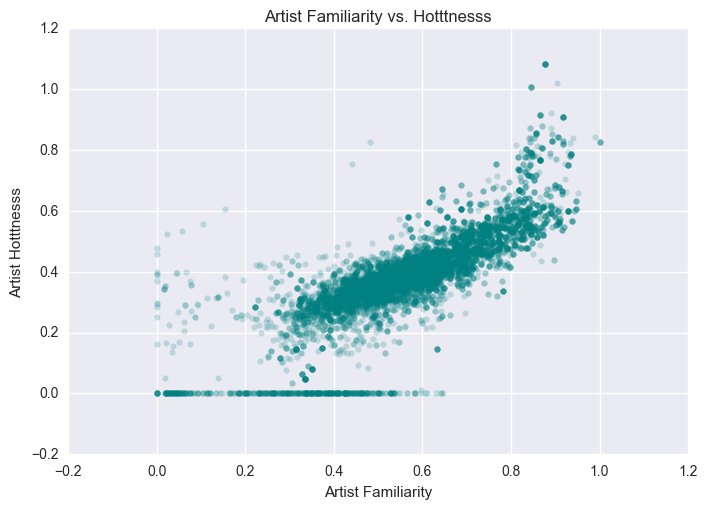

In [8]:
plt.scatter(track_data.artist_familiarity, track_data.artist_hotttnesss, lw=0, alpha=.2, color='#008080')
plt.xlabel("Artist Familiarity")
plt.ylabel("Artist Hotttnesss")
plt.title("Artist Familiarity vs. Hotttnesss")

There seems to be a linear relationship between artist familiarity and hotttnesss, however, if I wanted to fit a linear regression on this, I'd probably have to remove the 0s. 

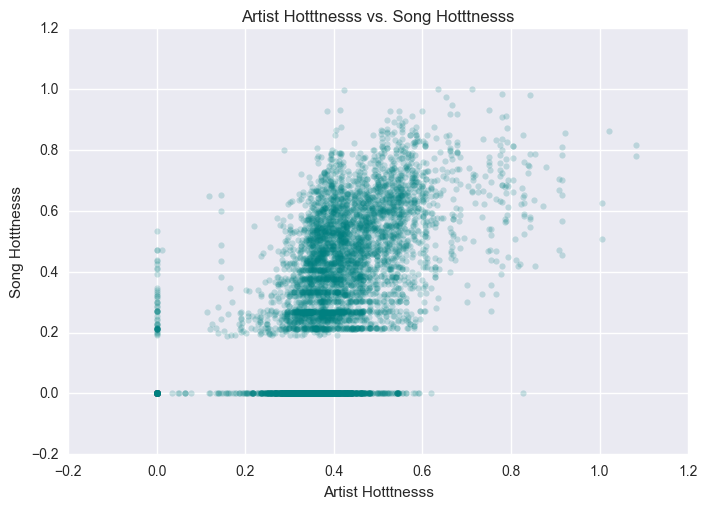

In [9]:
plt.scatter(track_data.artist_hotttnesss, track_data.song_hotttnesss, lw=0, alpha=.2, color='#008080')
plt.xlabel("Artist Hotttnesss")
plt.ylabel("Song Hotttnesss")
plt.title("Artist Hotttnesss vs. Song Hotttnesss")

Don't really see a linear relationship, but we could see how this changes for specific genres. Again, we'd have to remove the 0s.

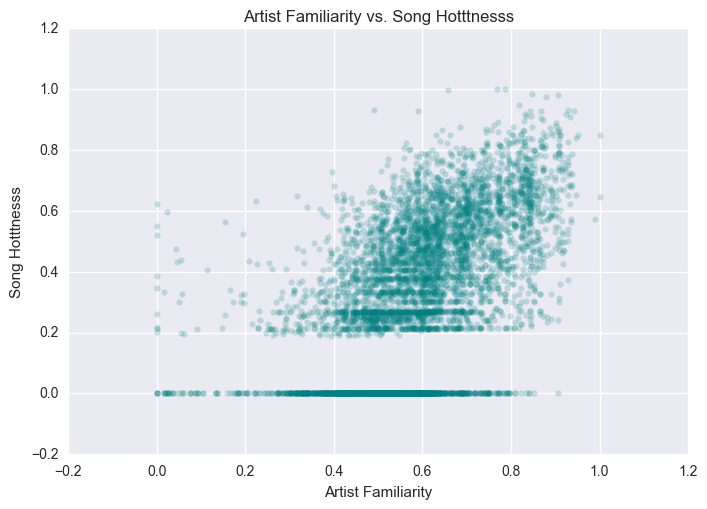

In [10]:
plt.scatter(track_data.artist_familiarity, track_data.song_hotttnesss, lw=0, alpha=.2, color='#008080')
plt.xlabel("Artist Familiarity")
plt.ylabel("Song Hotttnesss")
plt.title("Artist Familiarity vs. Song Hotttnesss")

This relationship looks a bit better than that of artist hotttnesss and song hotttness, which is not what I expected... We should explore this by genre later.

# Add Genre Data

In [11]:
genre = pd.read_table('http://www.ifs.tuwien.ac.at/mir/msd/partitions/msd-MAGD-genreAssignment.cls',sep='\t')

In [12]:
genre.columns=['track_id','genre_id']

In [13]:
genre.head()

,track_id,genre_id
0,TRAAAAV128F421A322,Pop_Rock
1,TRAAAAW128F429D538,Rap
2,TRAAABD128F429CF47,Pop_Rock
3,TRAAACV128F423E09E,Pop_Rock
4,TRAAADT12903CCC339,Easy_Listening


In [14]:
genre.shape

(422713, 2)

In [15]:
genre.genre_id.unique()

array(['Pop_Rock', 'Rap', 'Easy_Listening', 'Vocal', 'Electronic', 'Blues',
       'RnB', 'Folk', 'Religious', 'Country', 'Jazz', 'New Age', 'Latin',
       'International', 'Comedy_Spoken', 'Reggae', 'Stage ', 'Children',
       'Classical', 'Avant_Garde', 'Holiday'], dtype=object)

In [16]:
num_rap = np.sum(genre.genre_id == 'Rap')
print "Number of rap songs in GENRE dataset: %d Percentage rap: %.2f" % (num_rap, 100*float(num_rap)/len(genre))

num_country = np.sum(genre.genre_id == 'Country')
print "Number of rap songs in GENRE dataset: %d Percentage rap: %.2f" % (num_country, 100*float(num_country)/len(genre))

Number of rap songs in GENRE dataset: 20939 Percentage rap: 4.95
Number of rap songs in GENRE dataset: 11772 Percentage rap: 2.78


In [17]:
master_data = pd.merge(track_data, genre, on='track_id')

In [18]:
master_data.head()

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,key,loudness,loudness_max,loudness_start,song_hotttnesss,tempo,time_signature,title,track_id,year,genre_id
0,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,1,-11.197,[-60. -31.646 -34.565 -38.407 -34.696 -20.5...,[-60. -60. -40.84 -40.401 -38.456 -39.6...,0.602120,92.198,4,I Didn't Mean To,TRAAAAW128F429D538,0,Rap
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,6,-9.843,[-60. -14.269 -10.165 -18.098 -19.136 -18.9...,[-60. -60. -23.521 -25.16 -27.133 -24.2...,NaN,121.274,4,Soul Deep,TRAAABD128F429CF47,1969,Pop_Rock
2,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0,-9.013,[-18.682 -9.55 -9.709 -8.633 -7.434 -11.7...,[-60. -27.665 -21.241 -15.222 -18.915 -15.0...,NaN,119.293,4,Something Girls,TRAAAEF128F4273421,1982,Pop_Rock
3,0.651046,0.401724,ARXR32B1187FB57099,NaN,NaN,NaN,Gob,209.60608,2,-4.501,[-59.813 -7.713 -16.13 -2.512 -8.088 -8.7...,[-60. -59.828 -19.551 -32.609 -21.899 -20.1...,0.604501,129.738,4,Face the Ashes,TRAAAFD128F92F423A,2007,Pop_Rock
4,0.535293,0.385471,ARKFYS91187B98E58F,NaN,NaN,NaN,Jeff And Sheri Easter,267.70240,5,-9.323,[-58.879 -54.379 -46.634 -45.289 -43.067 -42.4...,[-60. -58.929 -54.569 -48.97 -46.964 -45.4...,NaN,147.782,3,The Moon And I (Ordinary Day Album Version),TRAAAMO128F1481E7F,0,Religious


In [19]:
master_data.shape

(4011, 19)

We only have around 4K rows, which isn't great, but we can still use this for some analysis. Let's look at the 1m subset with fewer song attributes.

In [20]:
master_data.to_csv('../MSD-Data/datasets/genre_track_data.csv',index=False)

# Artist (with fewer song attributes) and Lyrics database exploration

In [20]:
from pandas.io import sql

sqlite_file = '../MSD-Data/databases/track_metadata.db'
conn_tmdb = sqlite3.connect(sqlite_file)

In [21]:
m_song_data = sql.read_sql("""
select *
from songs
""", con=conn_tmdb)

In [22]:
m_song_data.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [23]:
m_song_data.shape

(1000000, 14)

In [24]:
master_data_2 = pd.merge(m_song_data, genre, on='track_id')

In [25]:
master_data_2.track_id.nunique()

422713

Awesome! Let's get the lyrics dataset.

In [26]:
sqlite_file_2 = '/Users/Anahita/Documents/General Assembly/Data Science/project/MSD_Project/data/db/mxm_dataset.db'
conn_mxm = sqlite3.connect(sqlite_file_2)

In [27]:
mxm = sql.read_sql("""
select *
from lyrics
""", con=conn_mxm)

This query takes a long time to run since the lyrics database is huge... I need to export the relevant data somehow.

In [28]:
mxm.shape

(19045332, 5)

In [29]:
mxm.track_id.nunique()

237662

Join to master_data_2, which includes the artist data (with fewer song attributes) and genre data.

In [30]:
master_data_3 = pd.merge(master_data_2, mxm, on='track_id')

In [31]:
master_data_3.shape

(10603615, 19)

In [32]:
master_data_3.track_id.nunique()

131559

In [33]:
master_data_3.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work,genre_id,mxm_tid,word,count,is_test
0,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,the,36,0
1,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,you,25,0
2,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,to,2,0
3,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,and,8,0
4,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,a,2,0


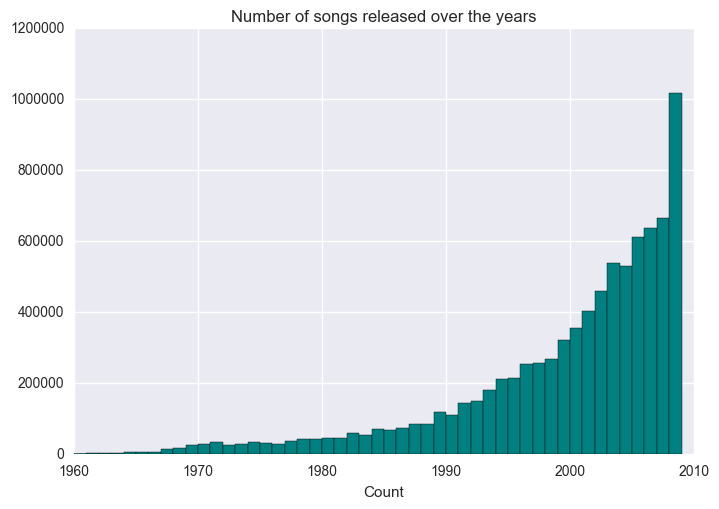

In [34]:
plt.hist(master_data_3.year, bins=np.arange(1960, 2010), color='#008080')
plt.xlabel("Release Year")
plt.xlabel("Count")
plt.title("Number of songs released over the years")

Add master_data_3 file to mxm database, since I wasn't able to export this dataset (not shown) due to encoding issues.

In [36]:
master_data_3.to_sql('master_data', if_exists='replace', index=False, con=conn_mxm)

In [37]:
res = conn_mxm.execute("SELECT * FROM sqlite_master WHERE type='table'")
res.fetchall()

[(u'table',
  u'words',
  u'words',
  2,
  u'CREATE TABLE words (word TEXT PRIMARY KEY)'),
 (u'table',
  u'lyrics',
  u'lyrics',
  4,
  u'CREATE TABLE lyrics (track_id, mxm_tid INT, word TEXT, count INT, is_test INT, FOREIGN KEY(word) REFERENCES words(word))'),
 (u'table',
  u'master_data',
  u'master_data',
  2384334,
  u'CREATE TABLE "master_data" (\n"track_id" TEXT,\n  "title" TEXT,\n  "song_id" TEXT,\n  "release" TEXT,\n  "artist_id" TEXT,\n  "artist_mbid" TEXT,\n  "artist_name" TEXT,\n  "duration" REAL,\n  "artist_familiarity" REAL,\n  "artist_hotttnesss" REAL,\n  "year" INTEGER,\n  "track_7digitalid" INTEGER,\n  "shs_perf" INTEGER,\n  "shs_work" INTEGER,\n  "genre_id" TEXT,\n  "mxm_tid" INTEGER,\n  "word" TEXT,\n  "count" INTEGER,\n  "is_test" INTEGER\n)')]

In [38]:
sql.read_sql("""
select *
from master_data
limit 5
""", con=conn_mxm)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work,genre_id,mxm_tid,word,count,is_test
0,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,the,36,0
1,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,you,25,0
2,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,to,2,0
3,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,and,8,0
4,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0,Pop_Rock,674743,a,2,0


It's there! Please see my r code to see how I exported the data I care about.

## Exploration of Master Data using SQL

In [39]:
sql.read_sql("""
select count(distinct track_id)
from master_data
""", con=conn_mxm)

,count(distinct track_id)
0,131559


In [40]:
sql.read_sql("""
select count(distinct artist_id)
from master_data
""", con=conn_mxm)

,count(distinct artist_id)
0,12343


In [43]:
sql.read_sql("""
select distinct genre_id, count(distinct track_id)
from master_data
group by genre_id
order by 2 desc
""", con=conn_mxm)

,genre_id,count(distinct track_id)
0,Pop_Rock,95752
1,Latin,5537
2,Rap,5291
3,Country,5064
4,RnB,4689
5,Electronic,3624
6,Religious,3501
7,International,2155
8,Vocal,1497
9,Folk,1344


# Further Data Manipulation and Subsetting 

Goal: get unstemmed words

In [15]:
data = pd.read_csv('../MSD-Data/datasets/data.csv')

In [16]:
data.shape

(10603615, 22)

In [17]:
list(data.columns.values)

['Unnamed: 0',
 'track_id',
 'title',
 'song_id',
 'release',
 'artist_id',
 'artist_mbid',
 'artist_name',
 'duration',
 'artist_familiarity',
 'artist_hotttnesss',
 'year',
 'track_7digitalid',
 'shs_perf',
 'shs_work',
 'genre_id',
 'mxm_tid',
 'word',
 'count',
 'is_test',
 'word_length',
 'unstemmed']

In [18]:
del data['Unnamed: 0']

In [19]:
words = pd.read_excel('../MSD-Data/datasets/unstemmed.xlsx')

In [20]:
data_2 = pd.merge(data, words, how='left', left_on='word',right_on='stemmed')

/Applications/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:1207: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [21]:
data_2.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,...,shs_work,genre_id,mxm_tid,word,count,is_test,word_length,unstemmed_x,stemmed,unstemmed_y
0,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,...,0,Pop_Rock,674743,the,36,0,3,NaN,the,the
1,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,...,0,Pop_Rock,674743,you,25,0,3,NaN,you,you
2,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,...,0,Pop_Rock,674743,to,2,0,2,NaN,to,to
3,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,...,0,Pop_Rock,674743,and,8,0,3,NaN,and,and
4,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,...,0,Pop_Rock,674743,a,2,0,1,NaN,a,a


#### time to delete: unamed, song_id, release, artist_mbid,  track_7digitalid, shs_perf, shs_work, mxm_tid, is_test, unstemmed_x, stemmed

In [22]:
del data_2['song_id']
del data_2['release']
del data_2['artist_mbid']
del data_2['track_7digitalid']
del data_2['shs_perf']
del data_2['shs_work']
del data_2['mxm_tid']
del data_2['is_test']
del data_2['unstemmed_x']
del data_2['stemmed']

In [23]:
data_2.rename(columns={'unstemmed_y':'unstemmed_word'}, inplace=True)

In [24]:
data_2.to_csv('../MSD-Data/datasets/data_final.csv',index=False)